### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Problem definition
Predict the medical insurance cost that an individual should pay based on their physiological and personal characteristics.

### Import data and create DataFrame

In [2]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Descriptive analysis

In [3]:
# Check the dimensions
df.shape

(1338, 7)

In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Generate a statistical summary of numerical columns and transpose it for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Observations
- There are 1338 rows and 7 columns.
- There are no null values in any of the columns/rows.
- The data contains 4 numerical features and 3 categorical features.

### Data Cleaning

In [6]:
# Looking for duplicated data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
# Dropping duplicates if True
if df.duplicated().sum():
        df = df.drop_duplicates()
        
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Observations
We have removed the 1 duplicated row.

In [8]:
# Checking some columns
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### Visualization

In [9]:
# Factorize for categorical features
df_factorized = df.copy()
df_factorized["sex_n"] = pd.factorize(df_factorized["sex"])[0]
df_factorized["smoker_n"] = pd.factorize(df_factorized["smoker"])[0]
df_factorized["region_n"] = pd.factorize(df_factorized["region"])[0]
df_factorized.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


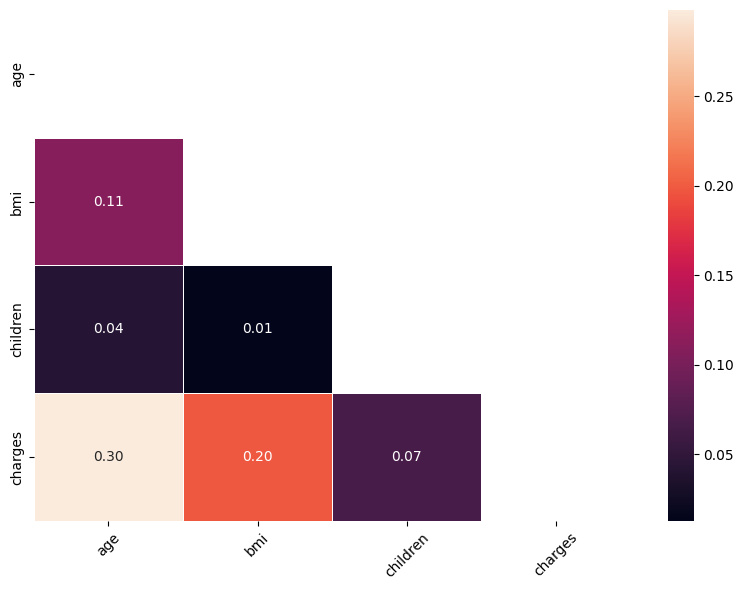

In [10]:
# Numerical features
numerical_columns = ["age", "bmi", "children", "charges"]
corr_numerical_columns = df_factorized[numerical_columns].corr()
mask_numerical = np.triu(np.ones_like(corr_numerical_columns, dtype = bool))

fig, axis = plt.subplots(figsize = (8, 6))
sns.heatmap(corr_numerical_columns, mask = mask_numerical, annot = True, linewidths = 0.5, fmt = ".2f")
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

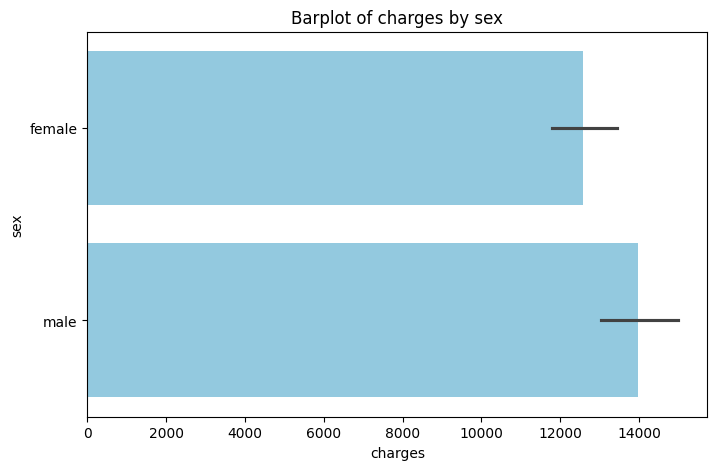

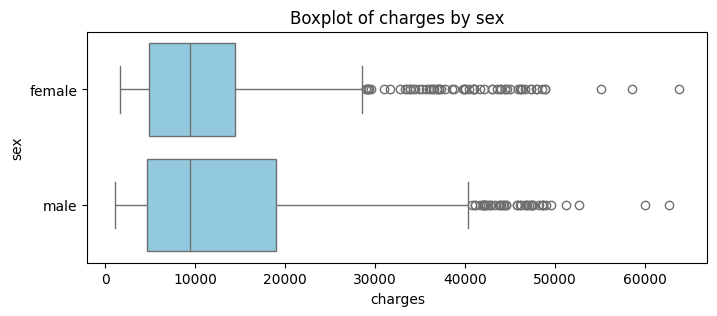

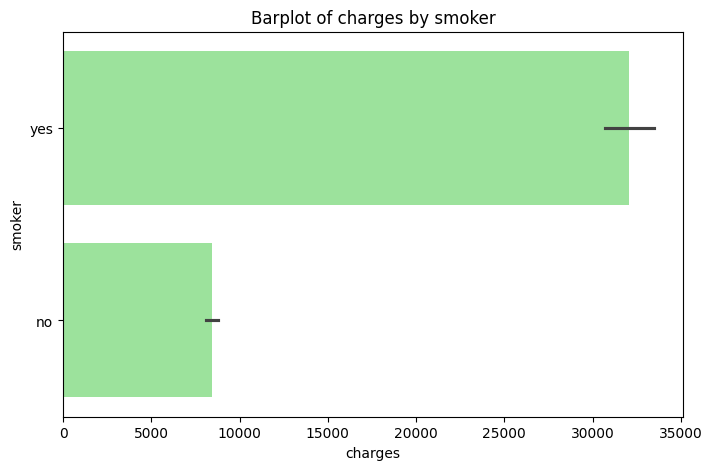

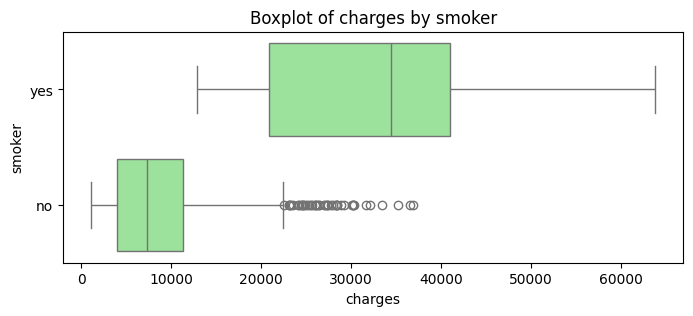

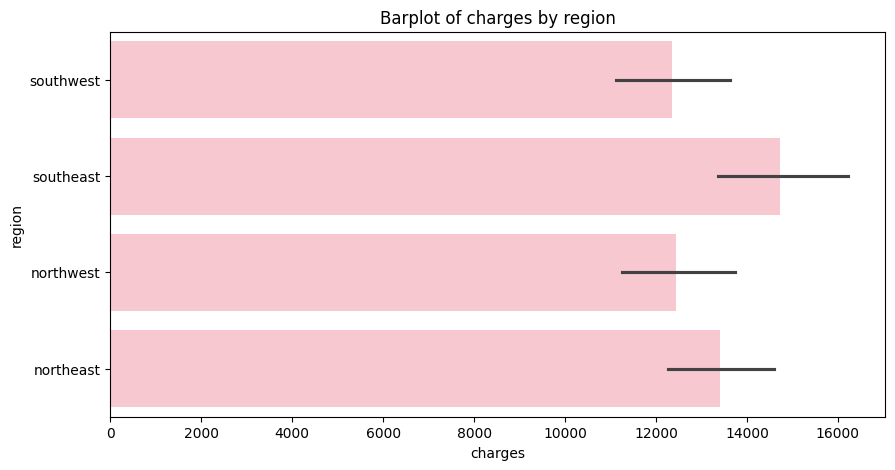

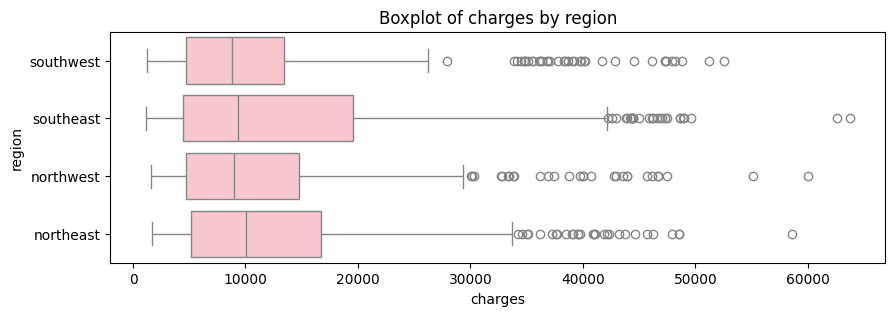

In [11]:
# Categorical features
plt.figure(figsize = (8, 5))
sns.barplot(data = df, y = "sex", x = "charges", color = "skyblue")
plt.title("Barplot of charges by sex")
plt.show()

plt.figure(figsize = (8, 3))
sns.boxplot(data = df, y = "sex", x = "charges", orient = "h", color = "skyblue")
plt.title("Boxplot of charges by sex")
plt.show()

plt.figure(figsize = (8, 5))
sns.barplot(data = df, y = "smoker", x = "charges", color = "lightgreen")
plt.title("Barplot of charges by smoker")
plt.show()

plt.figure(figsize = (8, 3))
sns.boxplot(data = df, y = "smoker", x = "charges", orient = "h", color = "lightgreen")
plt.title("Boxplot of charges by smoker")
plt.show()

plt.figure(figsize = (10, 5))
sns.barplot(data = df, y = "region", x = "charges", color = "pink")
plt.title("Barplot of charges by region")
plt.show()

plt.figure(figsize = (10, 3))
sns.boxplot(data = df, y = "region", x = "charges", orient = "h", color = "pink")
plt.title("Boxplot of charges by region")
plt.show()

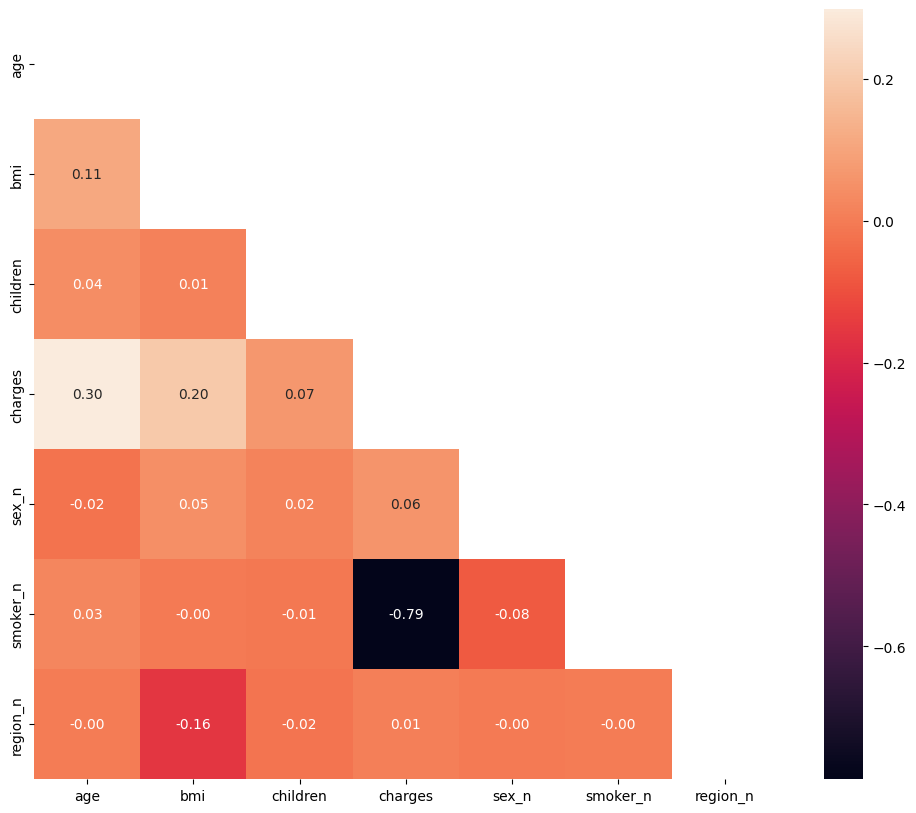

In [12]:
# All features
numeric_df = df_factorized[["age", "bmi", "children", "charges", "sex_n", "smoker_n", "region_n"]]
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, mask = mask, annot = True, fmt = ".2f")
plt.show()

In [13]:
# Dropping irrelevant column
df.drop(["region"], axis = 1, inplace = True)
df

/tmp/ipykernel_1089/3578191743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["region"], axis = 1, inplace = True)


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


### Observations
- In the first plot (numerical features), the strongest correlation is 0.30 between age and charges. This is expected, but it only indicates a weak relationship.
- In the categorical features plots, we observe the following:
- Sex: Males tend to pay slightly more than females, although the difference is minimal. The boxplots also reveal some outliers in both groups.
- Smoker: There is a clear distinction, with smokers paying significantly more than non-smokers. No outliers are present.
- Region: Charges are fairly uniform across regions, with few outliers. As the plots show, the region does not seem to affect the insurance cost, so we will remove this column from our dataset.
- Finally, in the heatmap including all features, the only strong correlation is -0.79 between charges and smoker, which confirms our previous observation.

### Train / Test Split

In [14]:
# Define X (features) and y (target)
X = df.drop(columns = ["charges"])
y = df["charges"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### One Hot Encoding
I use One-Hot Encoding because linear regression cannot correctly handle categorical variables encoded as numbers (Label Encoding), since it would assume a numerical order that doesn’t exist. One-Hot Encoding avoids this by creating independent binary columns, preventing the model from inferring false relationships between categories. In addition, the two categorical columns only have two possible values each, so this encoding does not create many extra columns.

In [15]:
# Encode categorical columns
cat_columns = ["sex", "smoker"]
encoder = OneHotEncoder(sparse_output = False)

X_train_encoded = encoder.fit_transform(X_train[cat_columns])
X_test_encoded = encoder.transform(X_test[cat_columns])

X_train_one_hot = pd.DataFrame(X_train_encoded, columns = encoder.get_feature_names_out(cat_columns), index = X_train.index)
X_test_one_hot = pd.DataFrame(X_test_encoded, columns = encoder.get_feature_names_out(cat_columns), index = X_test.index)

X_train_final = pd.concat([X_train.drop(columns = cat_columns), X_train_one_hot], axis = 1)
X_test_final  = pd.concat([X_test.drop(columns = cat_columns), X_test_one_hot], axis = 1)

In [16]:
X_train_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
1114,23,24.510,0,0.0,1.0,1.0,0.0
968,21,25.745,2,0.0,1.0,1.0,0.0
599,52,37.525,2,1.0,0.0,1.0,0.0
170,63,41.470,0,0.0,1.0,1.0,0.0
275,47,26.600,2,1.0,0.0,1.0,0.0


### Feature Scaling

In [17]:
# Select only numeric columns + encoded columns
columns_to_scale = ["age", "bmi", "children"] + [column for column in X_train_final.columns if column.startswith("sex_") or column.startswith("smoker_")]

# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train_final[columns_to_scale])
X_train_scaled = scaler.transform(X_train_final[columns_to_scale])
X_test_scaled  = scaler.transform(X_test_final[columns_to_scale])

# Convert to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = columns_to_scale, index = X_train_final.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns = columns_to_scale, index = X_test_final.index)

X_train_scaled_df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
1114,-1.157680,-0.996928,-0.907908,-0.971409,0.971409,0.500292,-0.500292
968,-1.300619,-0.792762,0.766904,-0.971409,0.971409,0.500292,-0.500292
599,0.914926,1.154664,0.766904,1.029432,-1.029432,0.500292,-0.500292
170,1.701087,1.806837,-0.907908,-0.971409,0.971409,0.500292,-0.500292
275,0.557580,-0.651417,0.766904,1.029432,-1.029432,0.500292,-0.500292


### Linear Regression

In [18]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled_df, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Model's intercept and coefficients
f"Intercept (a): {model.intercept_}, Coefficients (b): {model.coef_}"

'Intercept (a): 13030.203369289053, Coefficients (b): [ 3485.35147941  1848.5563011    642.41632931    21.24782046\n   -21.24782046 -4611.89009877  4611.89009877]'

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled_df)
y_pred

array([ 7780.09204548,  5977.83338997, 14215.82300956, 31590.59473466,
        9223.64922442, 13438.43822409, 29841.65667782,  1685.03795715,
       10919.46514725, 11281.04050309, 10418.78669104, 33059.36084168,
       30531.50988264, 17420.0023959 , 10214.90616935,  9749.75223135,
        4298.47335596, 32007.67725019,  3488.96062241,  5583.27330599,
        3845.53703027, 29815.02239719, 15103.39914515, 30646.34708594,
       30908.30211535,  5363.08477297, 35705.172843  , 36714.56751572,
       10928.83748576, 13689.22034633,  5994.25520485, 13015.10761713,
         842.10884744, 12332.40611586, 39769.78804625, 12472.16793437,
        4941.6340669 ,  3962.34504306, 31334.30270026,  9347.27340131,
        6423.31161511, 29743.01929574, 35062.57980736, 11806.50755259,
        7409.90515685,  3638.00400509,  5572.08908023,  9165.34126485,
        4217.22289854,  9367.5521687 ,  6914.22550367, 11443.85328341,
       30801.79761652,  3861.35683277, 11172.20169464, 10108.79403925,
      

In [21]:
# Evaluating model's performance (Mean Squared Error (MSE) and the Coefficient of Determination (R^2))
f"MSE: {mean_squared_error(y_test, y_pred)}, R^2: {r2_score(y_test, y_pred)}"

'MSE: 35901914.11461985, R^2: 0.8046218811772659'